<a href="https://colab.research.google.com/github/LavishVaishnav/MODELS_MACHINE_LEARNING/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np


In [2]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

170498071/170498071 [==============================] - 3s 0us/step


(50000, 32, 32, 3)

In [3]:
X_test.shape

(10000, 32, 32, 3)

In [4]:
y_train.shape

(50000, 1)

In [5]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [6]:
y_train= y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [13]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [11]:
def plot_sample(X,y,index):
  plt.figure(figsize = (15,2))
  plt.imshow(X[index])
  plt.xlabel(classes[y[index]])


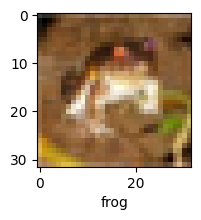

In [14]:
plot_sample(X_train, y_train, 0)

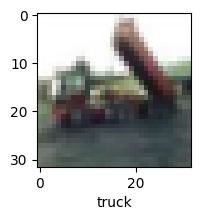

In [15]:
plot_sample(X_train, y_train, 2)

Normalize the images to a number from 0 to 1. Image has 3 channels (R,G,B) and each value in the channel can range from 0 to 255.

In [16]:
# Normalizing the Training dataset

X_train = X_train / 255.0
X_test = X_test / 255.0

In [17]:
X_train

array([[[[0.23137255, 0.24313725, 0.24705882],
         [0.16862745, 0.18039216, 0.17647059],
         [0.19607843, 0.18823529, 0.16862745],
         ...,
         [0.61960784, 0.51764706, 0.42352941],
         [0.59607843, 0.49019608, 0.4       ],
         [0.58039216, 0.48627451, 0.40392157]],

        [[0.0627451 , 0.07843137, 0.07843137],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509804, 0.21568627],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117647, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215686, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941176, 0.19607843],
         [0.47058824, 0.32941176, 0.19607843],
         [0.42745098, 0.28627451, 0.16470588]],

        ...,

        [[0.81568627, 0.66666667, 0.37647059],
         [0.78823529, 0.6       , 0.13333333]

In [ ]:
# Firstly with ANN to see it's accuracy with image dataset

In [18]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 155s 99ms/step - loss: 1.8068 - accuracy: 0.3567
Epoch 2/5
1563/1563 [==============================] - 136s 87ms/step - loss: 1.6194 - accuracy: 0.4288
Epoch 3/5
1563/1563 [==============================] - 136s 87ms/step - loss: 1.5410 - accuracy: 0.4560
Epoch 4/5
1563/1563 [==============================] - 137s 87ms/step - loss: 1.4803 - accuracy: 0.4785
Epoch 5/5
1563/1563 [==============================] - 140s 89ms/step - loss: 1.4314 - accuracy: 0.4979


In [19]:

from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 [==============================] - 12s 38ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.43      0.70      0.53      1000
           1       0.51      0.75      0.60      1000
           2       0.36      0.37      0.37      1000
           3       0.39      0.28      0.33      1000
           4       0.52      0.26      0.35      1000
           5       0.47      0.33      0.39      1000
           6       0.47      0.64      0.54      1000
           7       0.59      0.52      0.55      1000
           8       0.65      0.54      0.59      1000
           9       0.56      0.48      0.52      1000

    accuracy                           0.49     10000
   macro avg       0.49      0.49      0.48     10000
weighted avg       0.49      0.49      0.48     10000



In [20]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [21]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [22]:
cnn.fit(X_train, y_train, epochs=10)


Epoch 1/10
1563/1563 [==============================] - 68s 43ms/step - loss: 1.4328 - accuracy: 0.4887
Epoch 2/10
1563/1563 [==============================] - 67s 43ms/step - loss: 1.0772 - accuracy: 0.6235
Epoch 3/10
1563/1563 [==============================] - 65s 41ms/step - loss: 0.9473 - accuracy: 0.6727
Epoch 4/10
1563/1563 [==============================] - 65s 42ms/step - loss: 0.8670 - accuracy: 0.6985
Epoch 5/10
1563/1563 [==============================] - 65s 42ms/step - loss: 0.7982 - accuracy: 0.7231
Epoch 6/10
1563/1563 [==============================] - 65s 42ms/step - loss: 0.7408 - accuracy: 0.7417
Epoch 7/10
1563/1563 [==============================] - 66s 42ms/step - loss: 0.6895 - accuracy: 0.7608
Epoch 8/10
1563/1563 [==============================] - 65s 42ms/step - loss: 0.6490 - accuracy: 0.7738
Epoch 9/10
1563/1563 [==============================] - 66s 42ms/step - loss: 0.6081 - accuracy: 0.7889
Epoch 10/10
1563/1563 [==============================] - 75s 48m

In [23]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 6s 18ms/step - loss: 0.9590 - accuracy: 0.6920


[0.9589636921882629, 0.6919999718666077]

In [24]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 [==============================] - 5s 14ms/step


array([[3.58194299e-03, 1.04217179e-04, 6.25764442e-05, 5.38152516e-01,
        6.04339657e-05, 4.02321815e-01, 1.08005414e-02, 6.05278074e-05,
        4.47871052e-02, 6.83377148e-05],
       [4.06660023e-04, 4.61337604e-02, 2.57211582e-07, 2.39655069e-08,
        1.71482313e-08, 4.82902696e-09, 2.33108537e-08, 1.29192275e-08,
        9.53456879e-01, 2.40022200e-06],
       [4.70897928e-02, 6.30706400e-02, 7.79435155e-04, 6.38276432e-03,
        4.47641913e-04, 6.99134078e-04, 5.57868101e-04, 2.28122273e-03,
        8.77053678e-01, 1.63778407e-03],
       [6.59391999e-01, 1.86107159e-01, 6.96909577e-02, 1.82740972e-03,
        4.62000165e-03, 2.17043907e-05, 1.60755788e-03, 1.90385501e-04,
        7.44348764e-02, 2.10793316e-03],
       [7.87444492e-07, 6.71657290e-06, 3.65539268e-03, 8.31141602e-03,
        4.42388505e-02, 5.83728601e-04, 9.43161786e-01, 4.58462011e-07,
        3.81479731e-05, 2.77087702e-06]], dtype=float32)

In [25]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 0, 6]

In [28]:

y_test[:5]


array([3, 8, 8, 0, 6], dtype=uint8)

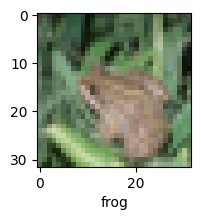

In [34]:
plot_sample(X_test, y_test,4)

In [33]:
classes[y_classes[4]]

'frog'